<a href="https://colab.research.google.com/github/Semanti20/Heart-Disease-Prediction-Model/blob/main/Heart_disease_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PATIENT SICKNESS PREDICTION

In [6]:
!wget https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction

--2024-03-01 04:21:28--  https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘heart-disease-prediction.1’

heart-disease-predi     [ <=>                ]   9.85K  --.-KB/s    in 0.004s  

2024-03-01 04:21:28 (2.32 MB/s) - ‘heart-disease-prediction.1’ saved [10083]



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.svm import SVC


In [8]:
df=pd.read_csv("/content/Heart_Disease_Prediction.csv")
print(df.shape)

(270, 14)


In [9]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


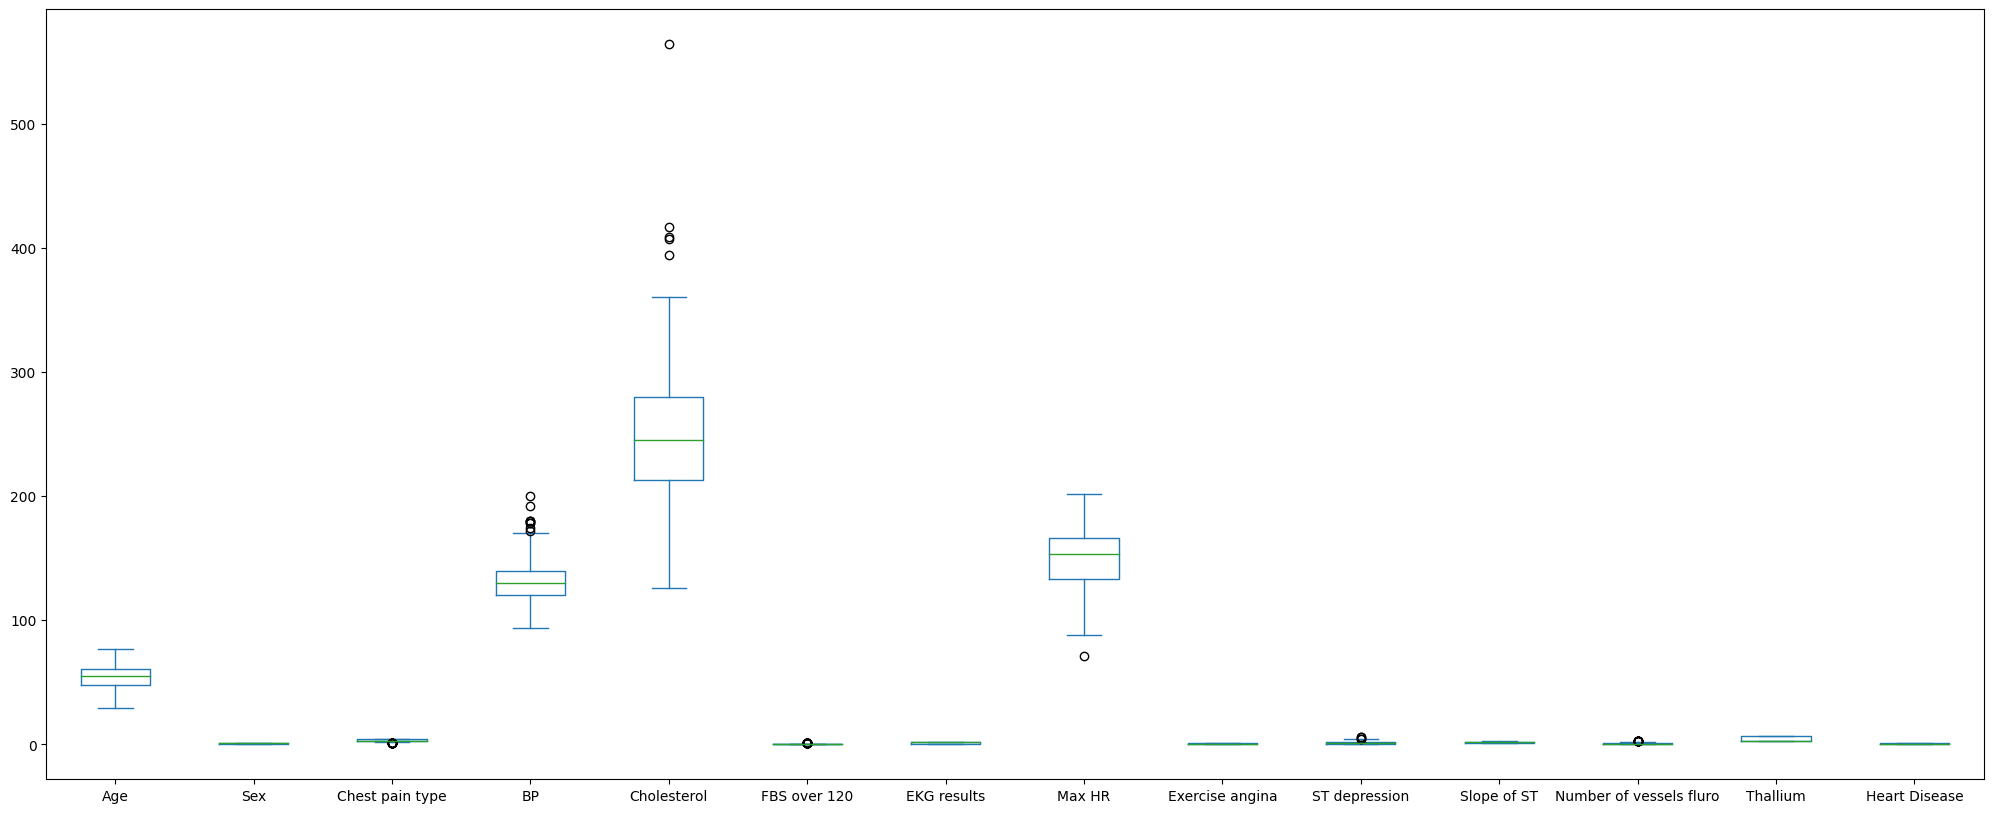

In [35]:
import matplotlib.pyplot as plt
df.plot(kind="box", figsize=(25, 10))
plt.show()


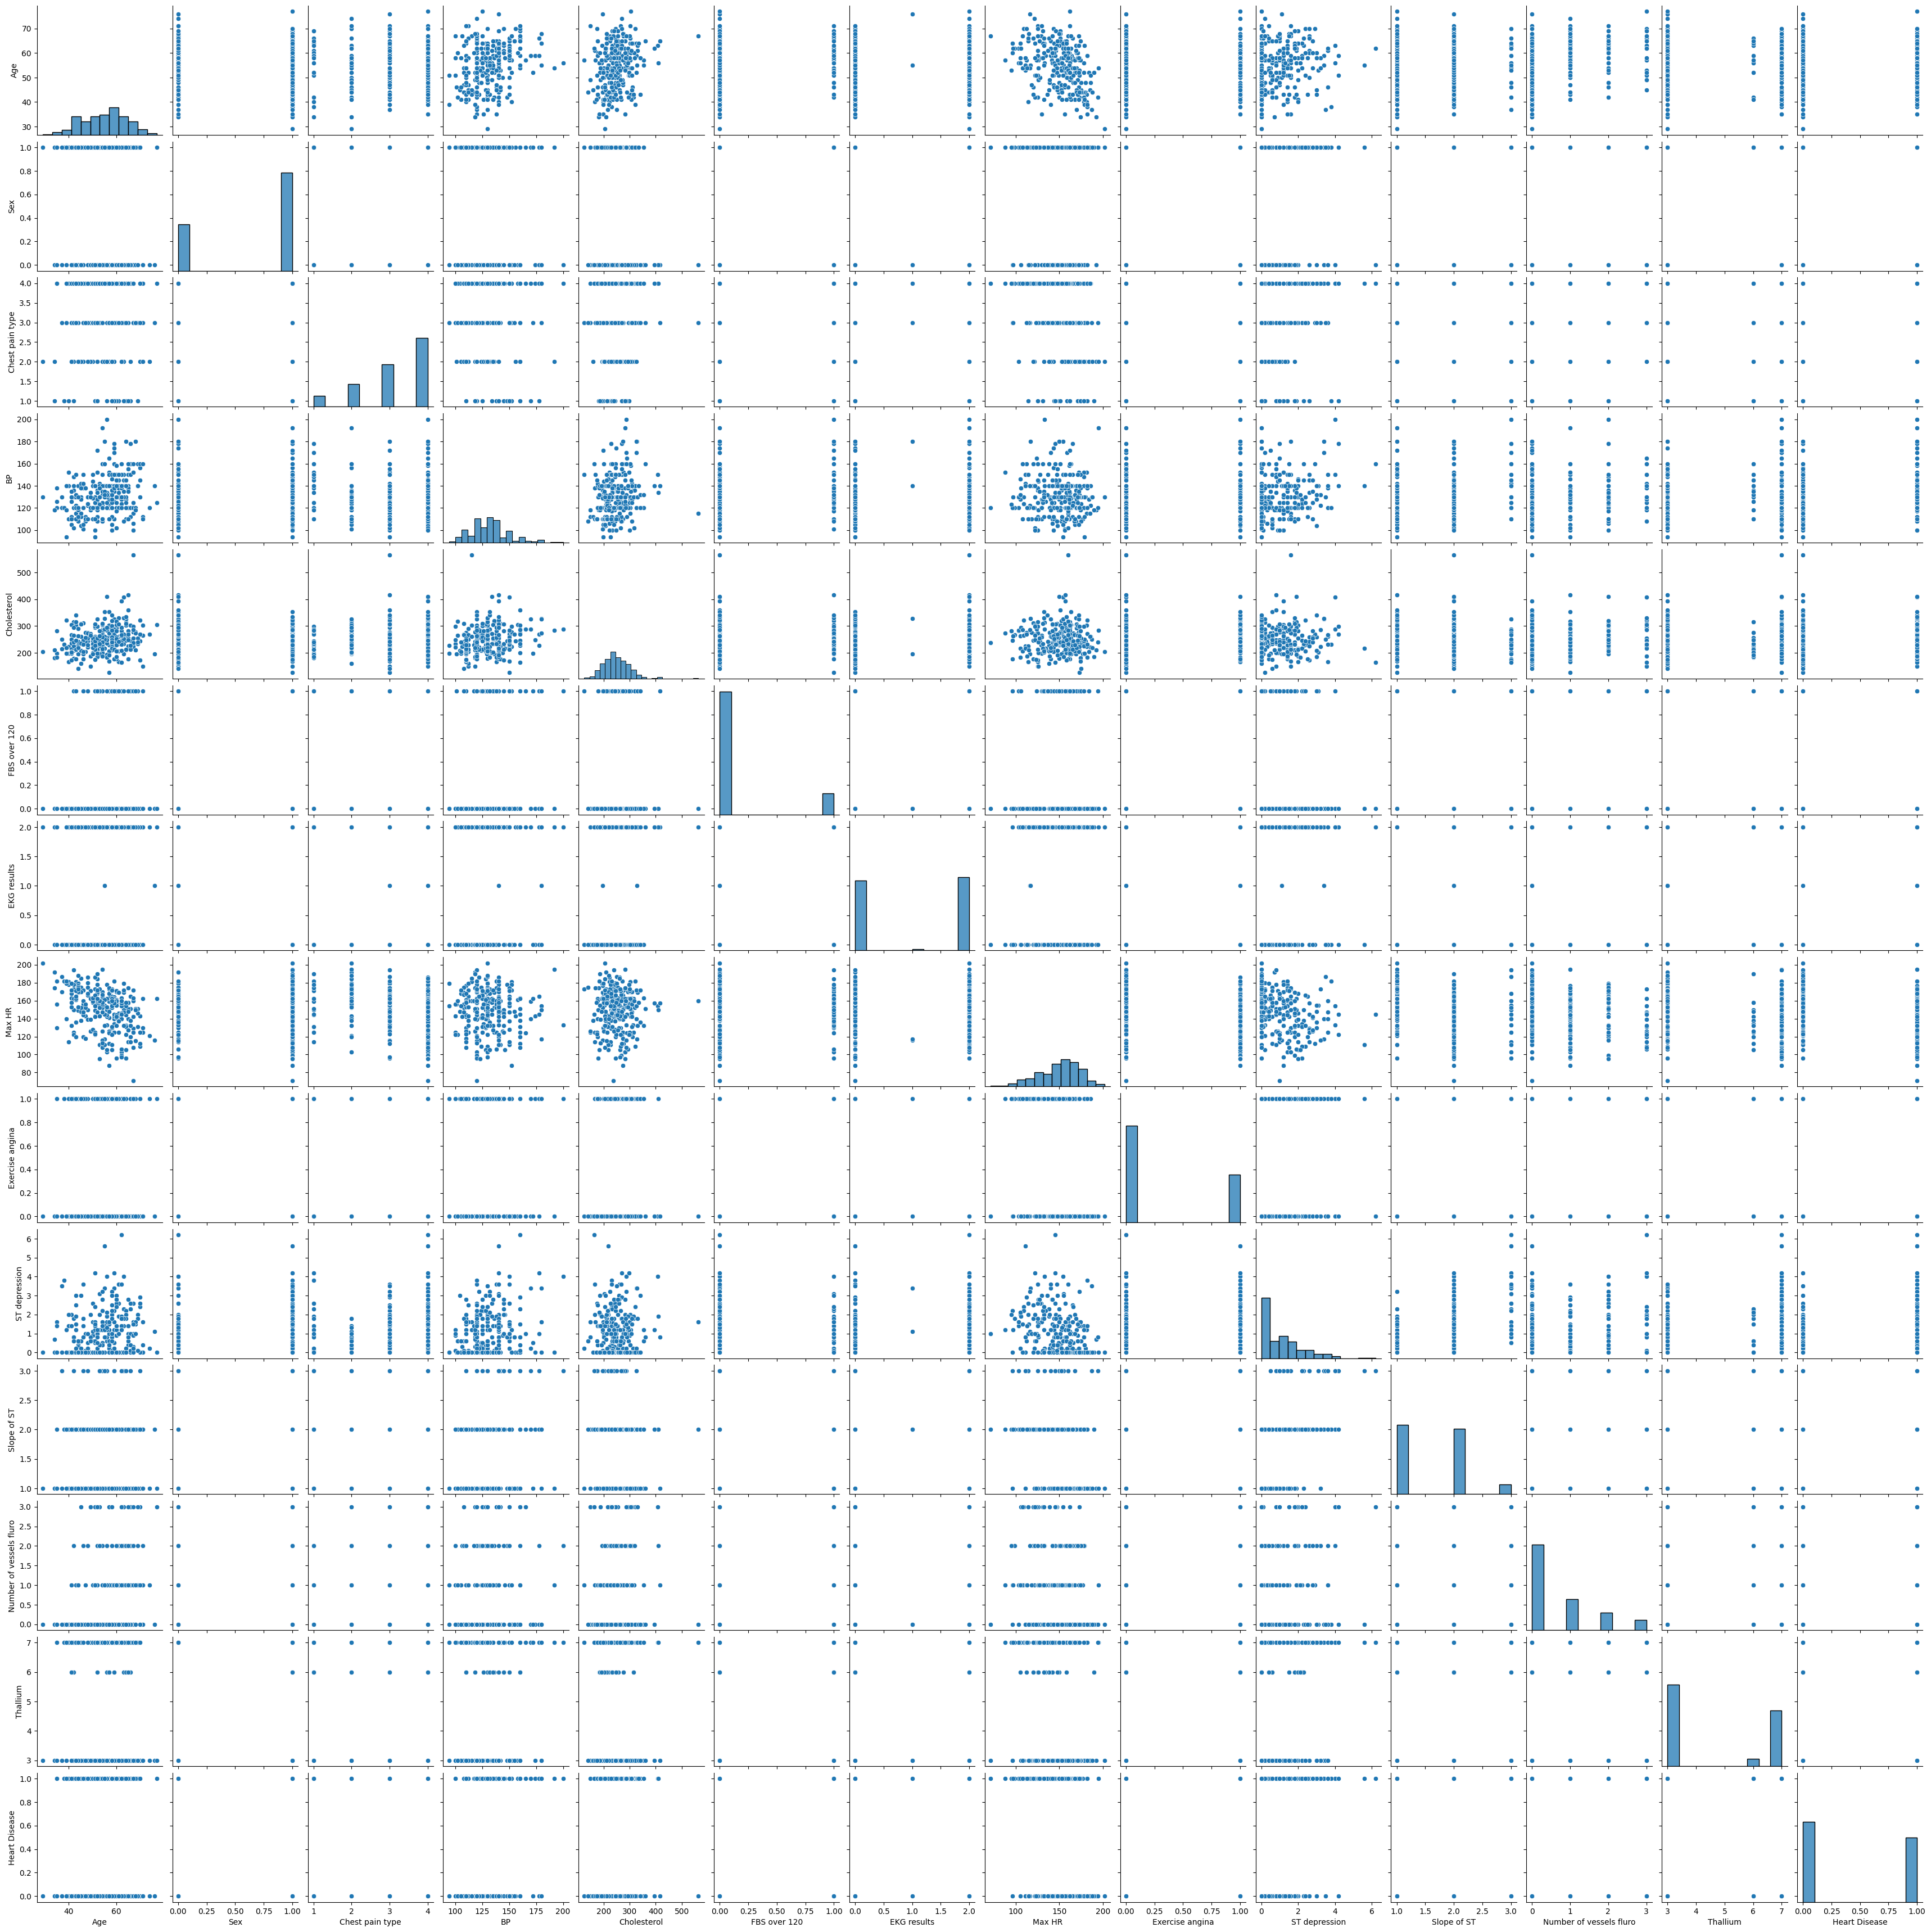

In [38]:
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()


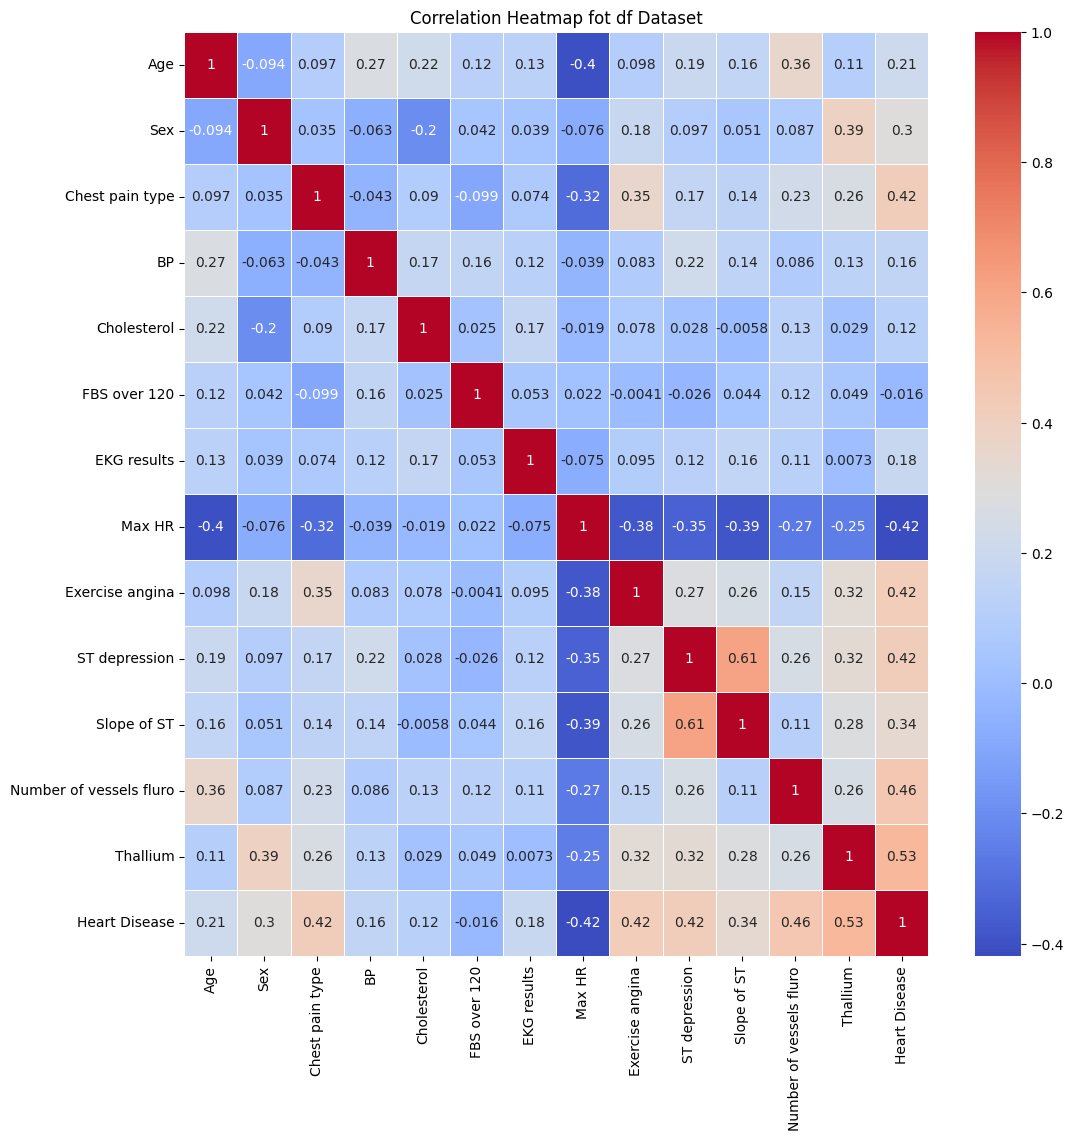

In [10]:
correlation_matrix=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix,annot= True, cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap fot df Dataset")
plt.show()

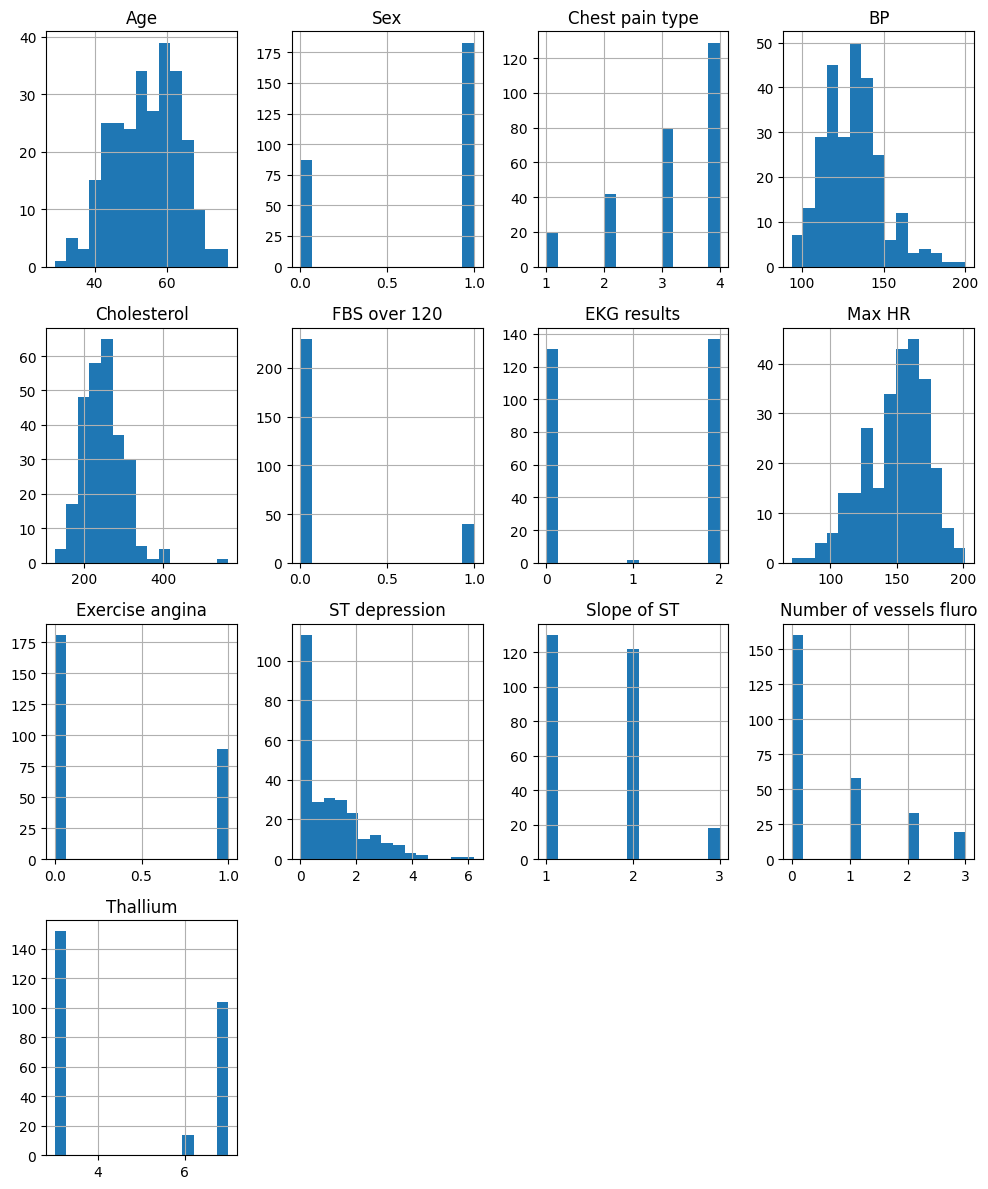

In [11]:
num_features=len(df.columns) - 1
rows,cols=num_features // 4 + 1,4
df.drop('Heart Disease',axis=1).hist(bins=15, figsize=(10, rows *3), layout=(rows,cols))
plt.tight_layout()
plt.show()

In [12]:
x=df.drop('Age',axis=1)
y=df[['Heart Disease']]

In [13]:
X_train,X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
svm=SVC(random_state=1, C=2, kernel='poly')

Accuracy: 0.7037037037037037
Confusion Matrix:
 [[28  5]
 [11 10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.85      0.78        33
           1       0.67      0.48      0.56        21

    accuracy                           0.70        54
   macro avg       0.69      0.66      0.67        54
weighted avg       0.70      0.70      0.69        54



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


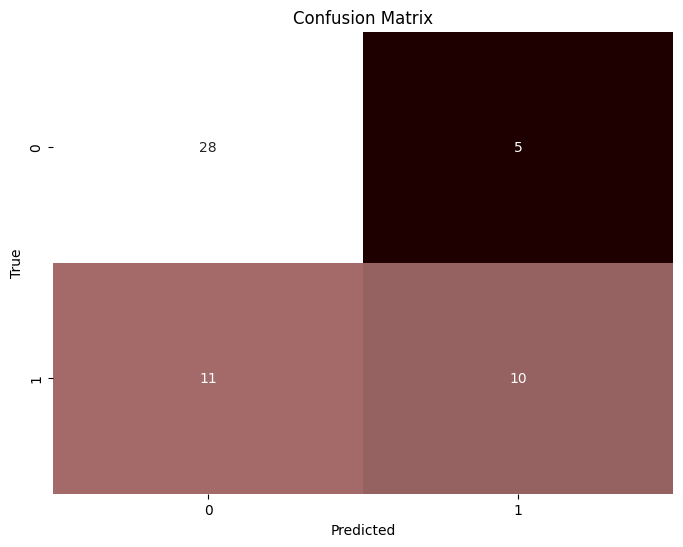

In [15]:
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-18-e72fefabfcdb>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Random Forest Accuracy: 1.0
Random Forest Confusion Matrix:
 [[33  0]
 [ 0 21]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        21

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



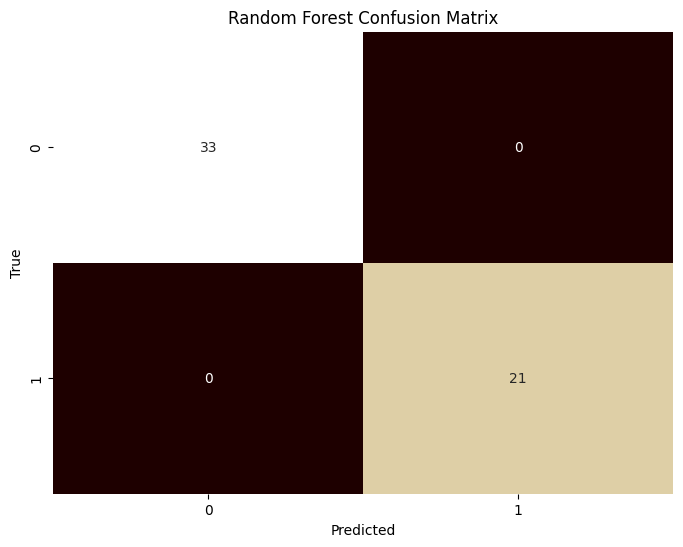

In [18]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", class_report_rf)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='pink', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_logistic)
print("Logistic Regression Classification Report:\n", class_report_logistic)

Logistic Regression Accuracy: 0.9074074074074074
Logistic Regression Confusion Matrix:
 [[32  1]
 [ 4 17]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


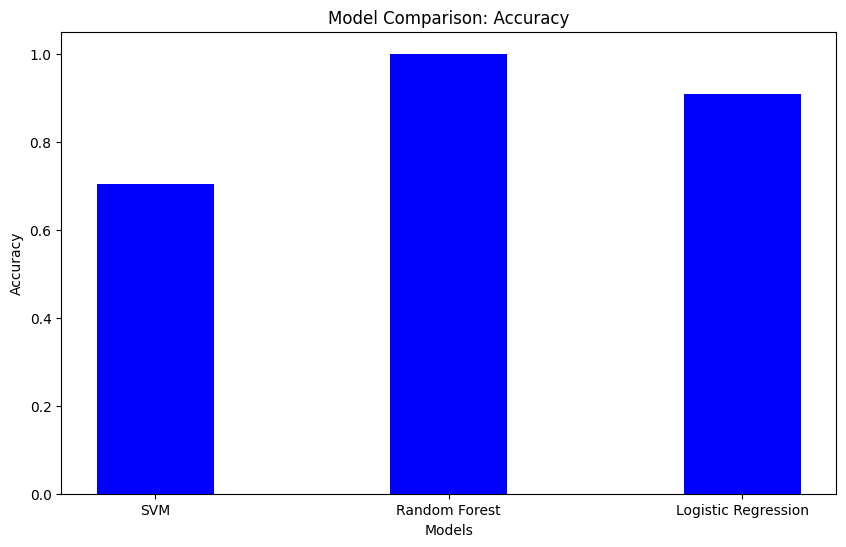

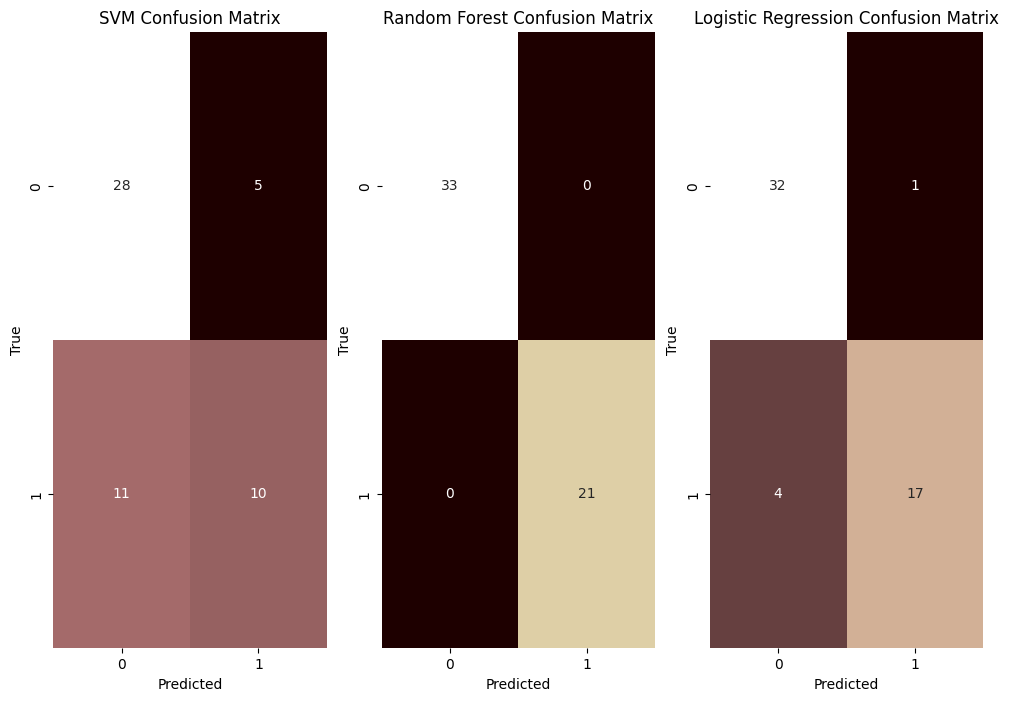

In [27]:
import matplotlib.pyplot as plt
models = ['SVM', 'Random Forest', 'Logistic Regression']
accuracies = [accuracy, accuracy_rf, accuracy_logistic]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='blue', width=0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.show()
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='pink', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='pink', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()
